rawdata  [ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -2.44929360e-16  7.07106781e-01  1.00000000e+00  7.07106781e-01
  3.67394040e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -4.89858720e-16  7.07106781e-01  1.00000000e+00  7.07106781e-01]


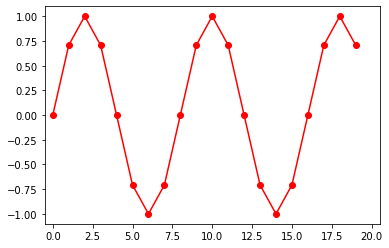

X_train.shape, Y_train.shape  =  (18, 3, 1) (18,)
X_train[0], Y_train[0]  =  [[0.        ]
 [0.70710678]
 [1.        ]] 0.7071067811865476


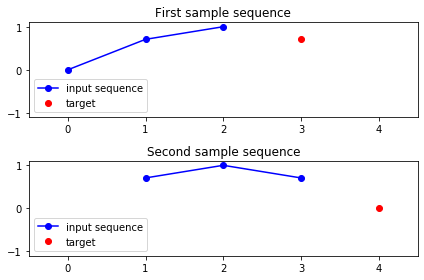

In [3]:
# %load ex_timeSeries_1_data.py
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
np.random.seed(0)

def make_data( showGraph=False ) :
    rawdata = np.sin(2 * np.pi * 0.125 * np.arange(20))

    if  showGraph :
        print( "rawdata ", rawdata )
        plt.plot(rawdata, 'ro-')
        plt.xlim(-0.5, 20.5)
        plt.ylim(-1.1, 1.1)
        plt.show()

    """
    Keras 에서 RNN 을 사용하려면 입력 데이터는 
    (nb_samples, timesteps, input_dim) 크기를 가지는 
    ndim=3인 3차원 텐서(tensor) 형태이어야 한다.

    nb_samples: 자료의 수
    timesteps: 순서열의 길이
    input_dim: x 벡터의 크기
    여기에서는 단일 시계열이므로 input_dim = 1 이고 
    3 스텝 크기의 순서열을 사용하므로 timesteps = 3 이며 자료의 수는 18 개이다.

    다음코드와 같이 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환하여 3차원 텐서를 만든다.
    """

    Data = np.fliplr(toeplitz(np.r_[rawdata[-1], np.zeros(rawdata.shape[0] - 2)], rawdata[::-1]))
    # print("Data", Data)
    # print(Data.shape)

    X_train = Data[:-1, :3][:, :, np.newaxis]
    Y_train = Data[:-1, 3]
    print("X_train.shape, Y_train.shape  = ", X_train.shape, Y_train.shape )
    print("X_train[0], Y_train[0]  = ", X_train[0], Y_train[0])

    if showGraph:
        plt.subplot(211)
        plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
        plt.plot([3], Y_train[0], 'ro', label="target")
        plt.xlim(-0.5, 4.5)
        plt.ylim(-1.1, 1.1)
        plt.legend()
        plt.title("First sample sequence")


        plt.subplot(212)
        plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
        plt.plot([4], Y_train[1], 'ro', label="target")
        plt.xlim(-0.5, 4.5)
        plt.ylim(-1.1, 1.1)
        plt.legend()
        plt.title("Second sample sequence")
        plt.tight_layout()
        plt.show()

    return (X_train,Y_train)


if __name__ == '__main__':
    make_data(True)


In [8]:
# %load ex_timeSeries_1_model.py

"""
우선 가장 단순한 신경망 구조인 SimpleRNN 클래스를 사용하는 방법은 다음 코드와 같다.
여기에서는 SimpleRNN 클래스 객체로 10개의 뉴런을 가지는 RNN 층을 만든다. 
첫번째 인수로는 뉴런의 크기, 
input_dim 인수로는 벡터의 크기, 
input_length 인수로는 순서열으 길이를 입력한다.
그 다음으로 SimpleRNN 클래스 객체에서 나오는 10개의 출력값을 
하나로 묶어 실수 값을 출력으로 만들기 위해 Dense 클래스 객체를 추가하였다.
손실 함수로는 mean-squred-error를, 최적화 방법으로는 
단순한 stochastic gradient descent 방법을 사용한다.
"""

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense


def make_model() :
    model = Sequential()
    model.add(SimpleRNN(10, input_shape= (3,1)) ) 
    model.add(Dense(1)  )  #, activation="linear"
    model.compile( loss= 'mse' , optimizer='sgd')
    model.summary()
    return model


In [9]:
import ex_timeSeries_1_data as ex_t1_d
import ex_timeSeries_1_model as ex_t1_m

import ex_timeSeries_2_data as ex_t2_d
import ex_timeSeries_2_model as ex_t2_m 


# sequence to vector 샘플 데이터 생성  예 
(X_train,Y_train) =ex_t1_d.make_data(True)
 


# sequence to sequence 샘플 데이터 생성 예 
# (X_train2,Y_train2) =ex_t2_d.make_data_Sequence2Sequence(True)
 

SyntaxError: invalid syntax (ex_timeSeries_1_model.py, line 24)